In [75]:
import numpy as np
import matplotlib.pyplot as plt

N = 30
P0 = 10140.05
tf = 365
dt = 1/360
mu = 0.002
sigma = 0.015
seed = 1

IbovNum = np.genfromtxt('IbovData.mat', delimiter=',')

np.random.seed(seed)


def black_scholes(N, P0, tf,dt,mu,sigma):

    p = np.full((N,round(tf/dt)), P0, dtype="float64")
    
    W = (np.random.uniform(0.,1., (N,round(tf/dt)))  > 0.5).astype(int)
    W = np.where(W==0, -1, W) 
    W = W*np.sqrt(dt)
    
    for n in range(N):
        for i in range(round(tf/dt)-1):
            p[n,i+1]  = mu*p[n,i]*dt + sigma*p[n,i]*W[n,i] + p[n,i]

    return p
        
P = black_scholes(N, P0, tf,dt,mu,sigma)


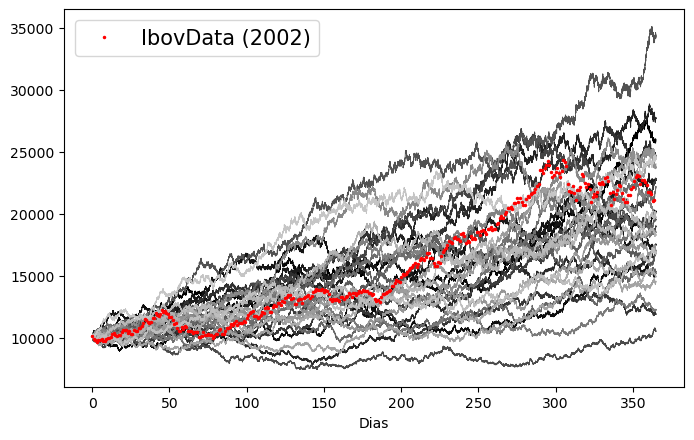

In [81]:
plt.figure(figsize=(8,5), dpi=100)
cont = 0
for i in P:
    plt.plot(np.arange(0,tf,dt), i, color=(0.8*(cont/N),0.8*(cont/N),0.8*(cont/N)), linewidth=0.6)
    cont+= 1
    
plt.plot(np.arange(0,tf,1),IbovNum[:365], '.',markersize=3, color='red', label="IbovData (2002)")


    
plt.xlabel("Dias")
plt.legend(loc=2, prop={'size': 15})
#plt.savefig("IbovData.png")
plt.show()
    

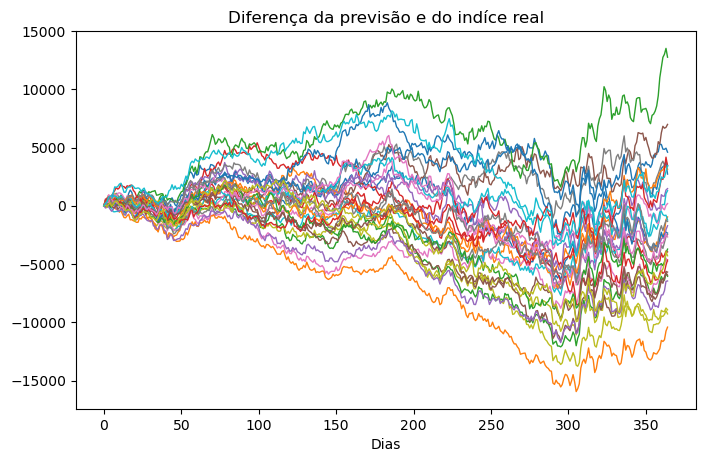

In [87]:
diff = np.zeros((N, 365))
t = np.arange(0,tf,dt)
for i in range(365):
    diff[:,i] = P[:,i*360] - IbovNum[i]
    
plt.figure(figsize=(8,5), dpi=100)
plt.plot(diff.T, linewidth=1)
plt.title("Diferença da previsão e do indíce real")
plt.xlabel("Dias")
plt.show()

In [88]:
diff_365 = np.zeros(N)
for i in range(N):
    diff_365[i] = P[i,-1] - IbovNum[365]

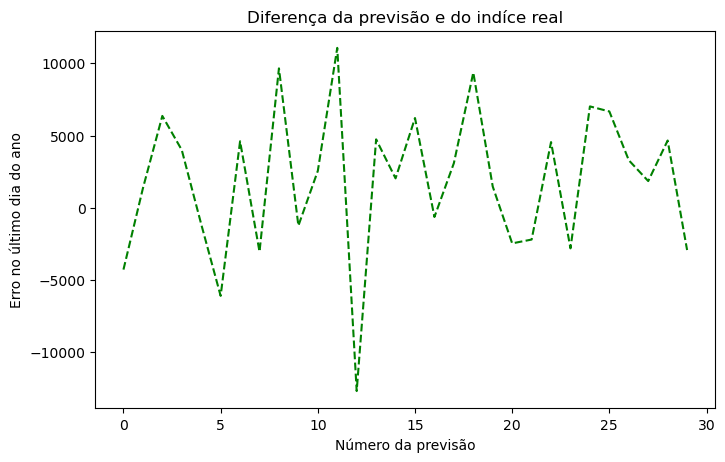

In [90]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(np.arange(0,N,1), -diff_365[:],'--', color='green')
plt.title("Diferença da previsão e do indíce real")
plt.ylabel("Erro no último dia do ano")


plt.xlabel("Número da previsão")
plt.savefig("diff_prev.png")
plt.show()